In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('match_list.json') as data_file:
    data = json.load(data_file)

result = json_normalize(data, 'matches')

result.head()

,champion,lane,matchId,platformId,queue,region,role,season,timestamp
0,75,TOP,121864211,RU,RANKED_FLEX_SR,RU,SOLO,PRESEASON2017,1482256007523
1,29,BOTTOM,121863856,RU,RANKED_FLEX_SR,RU,DUO_CARRY,PRESEASON2017,1482253905257
2,57,TOP,121873428,RU,RANKED_FLEX_SR,RU,SOLO,PRESEASON2017,1482251917961
3,157,TOP,121678633,RU,RANKED_FLEX_SR,RU,SOLO,PRESEASON2017,1482082100878
4,53,BOTTOM,121668112,RU,RANKED_FLEX_SR,RU,DUO_SUPPORT,PRESEASON2017,1482079041065


In [4]:
c_line = result['lane'].value_counts()
c_line

TOP       71
JUNGLE    52
BOTTOM    12
MID       11
Name: lane, dtype: int64

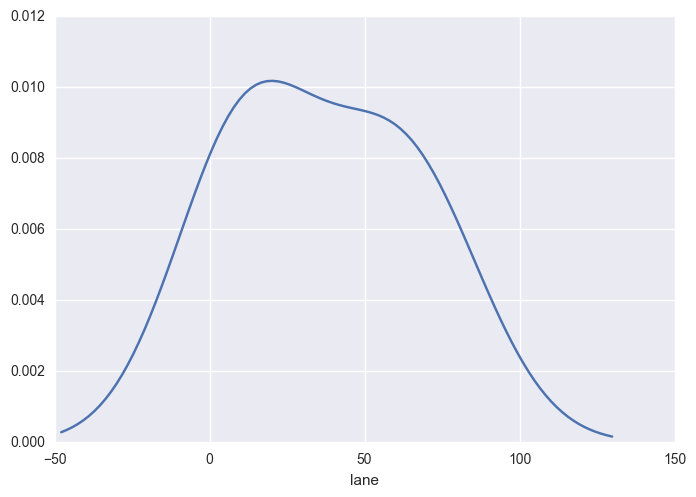

In [5]:
sns.distplot(c_line, hist=False)

In [6]:
import numpy as np
np.array(c_line)

array([71, 52, 12, 11])

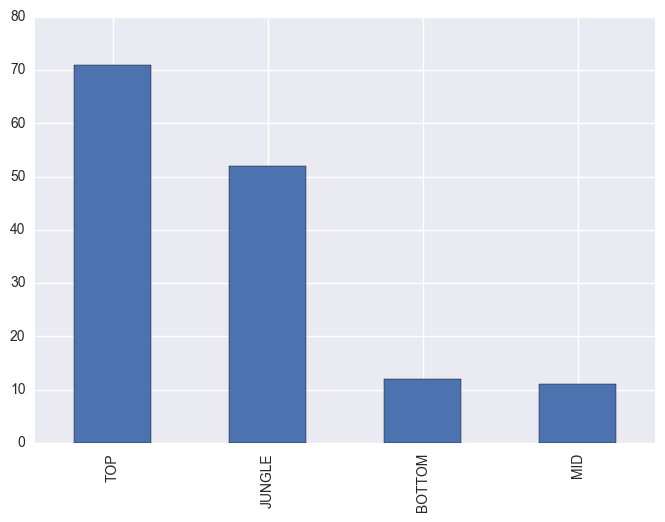

In [7]:
c_line.plot(kind='bar')

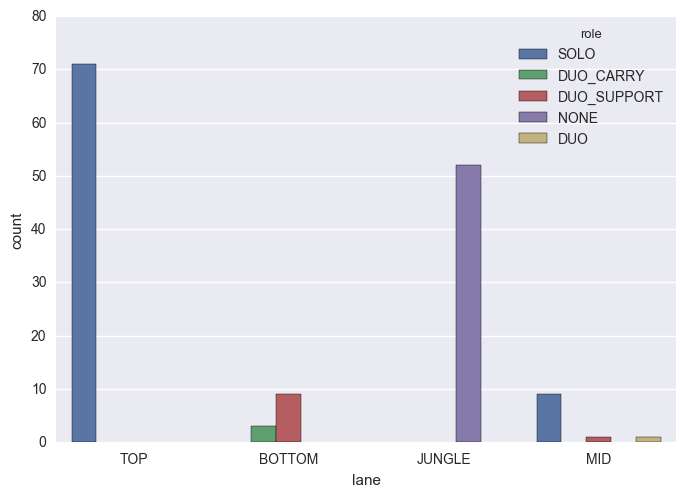

In [8]:
sns.countplot(x='lane', data=result, hue='role')

In [9]:
result.head()

,champion,lane,matchId,platformId,queue,region,role,season,timestamp
0,75,TOP,121864211,RU,RANKED_FLEX_SR,RU,SOLO,PRESEASON2017,1482256007523
1,29,BOTTOM,121863856,RU,RANKED_FLEX_SR,RU,DUO_CARRY,PRESEASON2017,1482253905257
2,57,TOP,121873428,RU,RANKED_FLEX_SR,RU,SOLO,PRESEASON2017,1482251917961
3,157,TOP,121678633,RU,RANKED_FLEX_SR,RU,SOLO,PRESEASON2017,1482082100878
4,53,BOTTOM,121668112,RU,RANKED_FLEX_SR,RU,DUO_SUPPORT,PRESEASON2017,1482079041065


In [10]:
# result['timestamp'] = pd.to_datetime(result['timestamp'], unit='ms')
# result.rename(columns={'timestamp':'date/time'}, inplace=True)
result.head()

,champion,lane,matchId,platformId,queue,region,role,season,timestamp
0,75,TOP,121864211,RU,RANKED_FLEX_SR,RU,SOLO,PRESEASON2017,1482256007523
1,29,BOTTOM,121863856,RU,RANKED_FLEX_SR,RU,DUO_CARRY,PRESEASON2017,1482253905257
2,57,TOP,121873428,RU,RANKED_FLEX_SR,RU,SOLO,PRESEASON2017,1482251917961
3,157,TOP,121678633,RU,RANKED_FLEX_SR,RU,SOLO,PRESEASON2017,1482082100878
4,53,BOTTOM,121668112,RU,RANKED_FLEX_SR,RU,DUO_SUPPORT,PRESEASON2017,1482079041065


In [11]:
result.drop(['season', 'platformId'], axis=1, inplace=True)
result.head()

,champion,lane,matchId,queue,region,role,timestamp
0,75,TOP,121864211,RANKED_FLEX_SR,RU,SOLO,1482256007523
1,29,BOTTOM,121863856,RANKED_FLEX_SR,RU,DUO_CARRY,1482253905257
2,57,TOP,121873428,RANKED_FLEX_SR,RU,SOLO,1482251917961
3,157,TOP,121678633,RANKED_FLEX_SR,RU,SOLO,1482082100878
4,53,BOTTOM,121668112,RANKED_FLEX_SR,RU,DUO_SUPPORT,1482079041065


In [12]:
import requests
import json

In [13]:
url = 'https://global.api.pvp.net/api/lol/static-data/ru/v1.2/champion?api_key='
r = requests.get(url)

In [14]:
c_dat = pd.read_json(url)

In [15]:
c_dat.drop(['type', 'version'], inplace=True, axis=1)

In [16]:
champion_data = c_dat['data'].apply(pd.Series)
champion_data.head()

,id,key,name,title
Aatrox,266,Aatrox,Атрокс,Клинок даркинов
Ahri,103,Ahri,Ари,Девятихвостая лиса
Akali,84,Akali,Акали,Кулак тени
Alistar,12,Alistar,Алистар,Минотавр
Amumu,32,Amumu,Амуму,Печальная мумия


In [17]:
df = result.copy()

In [18]:
df.head()

,champion,lane,matchId,queue,region,role,timestamp
0,75,TOP,121864211,RANKED_FLEX_SR,RU,SOLO,1482256007523
1,29,BOTTOM,121863856,RANKED_FLEX_SR,RU,DUO_CARRY,1482253905257
2,57,TOP,121873428,RANKED_FLEX_SR,RU,SOLO,1482251917961
3,157,TOP,121678633,RANKED_FLEX_SR,RU,SOLO,1482082100878
4,53,BOTTOM,121668112,RANKED_FLEX_SR,RU,DUO_SUPPORT,1482079041065


In [19]:
champion_data.rename(columns={'id': 'champion'}, inplace=True)

In [20]:
res = pd.merge(result, champion_data, on='champion')

In [21]:
res.head()

,champion,lane,matchId,queue,region,role,timestamp,key,name,title
0,75,TOP,121864211,RANKED_FLEX_SR,RU,SOLO,1482256007523,Nasus,Насус,Хранитель песков
1,75,TOP,121656078,RANKED_FLEX_SR,RU,SOLO,1482067141194,Nasus,Насус,Хранитель песков
2,75,TOP,97338449,TEAM_BUILDER_DRAFT_RANKED_5x5,RU,SOLO,1461244683710,Nasus,Насус,Хранитель песков
3,75,TOP,96283503,TEAM_BUILDER_DRAFT_RANKED_5x5,RU,SOLO,1460298526867,Nasus,Насус,Хранитель песков
4,29,BOTTOM,121863856,RANKED_FLEX_SR,RU,DUO_CARRY,1482253905257,Twitch,Твич,Чумная крыса


In [22]:
res.drop(['champion', 'key', 'title'],axis=1, inplace=True)

In [23]:
res.head()

,lane,matchId,queue,region,role,timestamp,name
0,TOP,121864211,RANKED_FLEX_SR,RU,SOLO,1482256007523,Насус
1,TOP,121656078,RANKED_FLEX_SR,RU,SOLO,1482067141194,Насус
2,TOP,97338449,TEAM_BUILDER_DRAFT_RANKED_5x5,RU,SOLO,1461244683710,Насус
3,TOP,96283503,TEAM_BUILDER_DRAFT_RANKED_5x5,RU,SOLO,1460298526867,Насус
4,BOTTOM,121863856,RANKED_FLEX_SR,RU,DUO_CARRY,1482253905257,Твич


In [24]:
res = res[['matchId', 'lane', 'role', 'name']]

In [25]:
res.head()

,matchId,lane,role,name
0,121864211,TOP,SOLO,Насус
1,121656078,TOP,SOLO,Насус
2,97338449,TOP,SOLO,Насус
3,96283503,TOP,SOLO,Насус
4,121863856,BOTTOM,DUO_CARRY,Твич


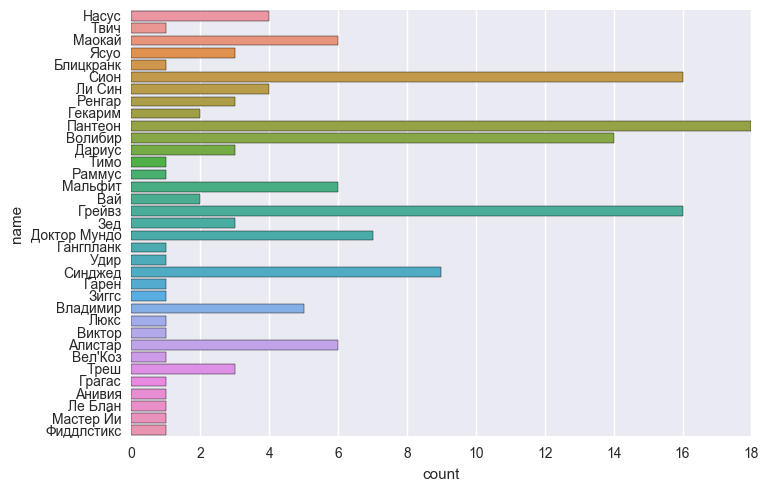

In [26]:
sns.countplot(y='name', data=res)